In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
voice_data = pd.read_csv('./barack_obama_deepfake_voice_export_filtered.csv')

voice_data.head()

,chroma,centroid,bandwidth,zcr,energy,contrast,rolloff,pitch,mfcc_1,mfcc_2,...,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,label
0,0.269301,176.729184,62.500524,0.021161,28.384923,25.952290,223.675272,196.431507,-648.519315,58.344010,...,38.203006,28.164115,17.689385,7.519363,-1.707747,-9.509567,-15.588810,-19.837237,-22.317068,bona-fide
1,0.283963,184.662077,45.314103,0.022765,23.121965,25.008413,220.626028,235.715188,-706.961838,71.815798,...,47.055780,34.738691,21.906311,9.468003,-1.798812,-11.314398,-18.731368,-23.936960,-27.026625,bona-fide
2,0.324474,196.589041,73.666571,0.023944,6.229047,25.086993,235.067247,230.268808,-696.992571,64.065457,...,43.449627,33.079096,22.079004,11.117777,0.807829,-8.329190,-15.899743,-21.666963,-25.557404,bona-fide
3,0.296837,174.092322,62.253762,0.021437,46.602222,25.525798,223.034274,190.079371,-627.520693,62.841146,...,42.382553,32.061935,21.185910,10.498064,0.659911,-7.804534,-14.544367,-19.395051,-22.369939,bona-fide
4,0.305266,191.368412,57.007519,0.023290,1.554806,25.862584,229.614826,236.798279,-796.603958,61.468854,...,40.490431,30.031115,19.107377,8.478404,-1.207543,-9.466738,-16.006912,-20.726707,-23.691312,bona-fide


In [3]:
## Data preprocessing 
# Check for missing values
voice_data_missing_values = voice_data.isnull().sum()

print("Columns with missing values:")
voice_data_missing_values

Columns with missing values:


chroma       0
centroid     0
bandwidth    0
zcr          0
energy       0
contrast     0
rolloff      0
pitch        0
mfcc_1       0
mfcc_2       0
mfcc_3       0
mfcc_4       0
mfcc_5       0
mfcc_6       0
mfcc_7       0
mfcc_8       0
mfcc_9       0
mfcc_10      0
mfcc_11      0
mfcc_12      0
mfcc_13      0
label        0
dtype: int64

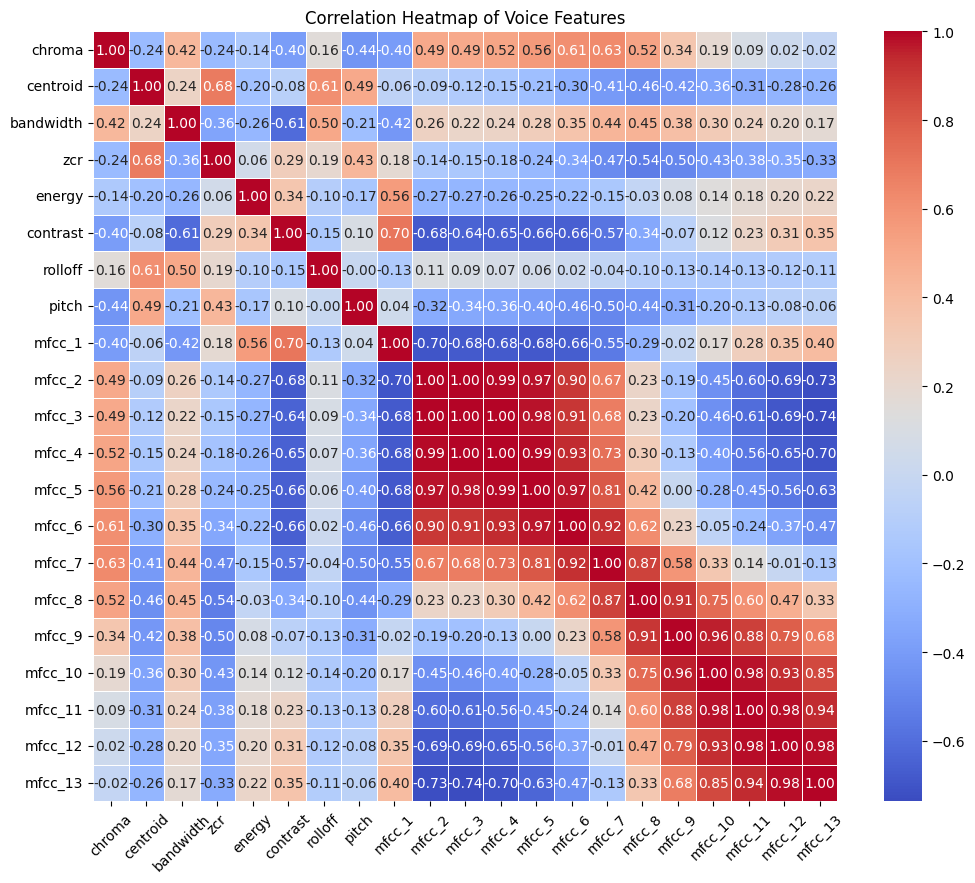

In [4]:
## Data visualization 
# correlation matrix

import seaborn as sns

voice_data_numeric_columns = voice_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = voice_data[voice_data_numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap of Voice Features')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [5]:
## X and Y data
X = voice_data.drop(columns=["label"], axis=1)
Y = voice_data["label"]

In [6]:
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (834, 21)
Shape of Y: (834,)


In [7]:
X.head()

,chroma,centroid,bandwidth,zcr,energy,contrast,rolloff,pitch,mfcc_1,mfcc_2,...,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13
0,0.269301,176.729184,62.500524,0.021161,28.384923,25.952290,223.675272,196.431507,-648.519315,58.344010,...,47.035569,38.203006,28.164115,17.689385,7.519363,-1.707747,-9.509567,-15.588810,-19.837237,-22.317068
1,0.283963,184.662077,45.314103,0.022765,23.121965,25.008413,220.626028,235.715188,-706.961838,71.815798,...,57.906493,47.055780,34.738691,21.906311,9.468003,-1.798812,-11.314398,-18.731368,-23.936960,-27.026625
2,0.324474,196.589041,73.666571,0.023944,6.229047,25.086993,235.067247,230.268808,-696.992571,64.065457,...,52.499861,43.449627,33.079096,22.079004,11.117777,0.807829,-8.329190,-15.899743,-21.666963,-25.557404
3,0.296837,174.092322,62.253762,0.021437,46.602222,25.525798,223.034274,190.079371,-627.520693,62.841146,...,51.391733,42.382553,32.061935,21.185910,10.498064,0.659911,-7.804534,-14.544367,-19.395051,-22.369939
4,0.305266,191.368412,57.007519,0.023290,1.554806,25.862584,229.614826,236.798279,-796.603958,61.468854,...,49.690092,40.490431,30.031115,19.107377,8.478404,-1.207543,-9.466738,-16.006912,-20.726707,-23.691312


In [8]:
Y.head()

0    bona-fide
1    bona-fide
2    bona-fide
3    bona-fide
4    bona-fide
Name: label, dtype: object

In [9]:
## Data Standardisation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [10]:
from sklearn.preprocessing import LabelEncoder

## Encoding of labeled data
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

print("Original classes:", label_encoder.classes_)

Original classes: ['bona-fide' 'spoof']


In [11]:
## Data splitting
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.5, random_state=42)

In [12]:
X_train.shape

(417, 21)

SVM Model

In [22]:
from sklearn.svm import SVC
from sklearn import metrics

# kernels = ['rbf', 'linear', 'sigmoid', 'poly']

## SVM Model 
svc=SVC(kernel='rbf')
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)
print('Accuracy Score : %0.2f' % metrics.accuracy_score(Y_test,Y_pred))

Accuracy Score : 0.98


Confusion Matrix

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       255
           1       0.97      0.98      0.98       162

    accuracy                           0.98       417
   macro avg       0.98      0.98      0.98       417
weighted avg       0.98      0.98      0.98       417



<Axes: >

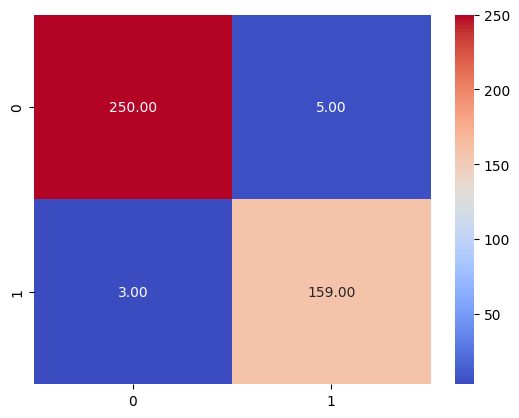

In [23]:
confusion = metrics.confusion_matrix(Y_test, Y_pred)
classification = metrics.classification_report(Y_test, Y_pred)
print(classification)
sns.heatmap(confusion , annot = True, cmap="coolwarm", fmt=".2f")

MLP Neural Network

In [15]:
#neural networks trial

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.01)
mlp.fit(X_train, Y_train)

Y_pred = mlp.predict(X_test)

mlp.score(X_test, Y_test)

0.9712230215827338

KNN Classifier

In [16]:
# knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

model = KNeighborsClassifier()

k_range = list(range(1, 101))
weight_options = ['uniform', 'distance']

param_dist = dict(n_neighbors=k_range, weights=weight_options)

knn = RandomizedSearchCV(estimator=model, cv=10, param_distributions=param_dist, n_iter=10)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)
print("KNN Accuracy (k={}): {}".format(knn.best_params_['n_neighbors'], knn.best_score_))

KNN Accuracy (k=2): 0.94732868757259


Neural Network Approach

In [17]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


learning_rate = 0.001
epochs = 20
batch_size = 64

num_classes = len(label_encoder.classes_)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.long)

# Define the neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc2 = nn.Linear(128, 32)
        self.fc3 = nn.Linear(32, num_classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.softmax(self.fc3(x), dim=1)
        return x

# Initialize the model
model = NeuralNetwork(input_size=X_train.shape[1], num_classes=num_classes)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Create data loaders
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Train the model
for epoch in range(epochs):
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

# Evaluate the model
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == Y_test_tensor).sum().item() / len(Y_test_tensor)

print("Test Accuracy:", accuracy)

Test Accuracy: 0.9808153477218226


Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score

# Initialize Decision Tree
clf = DecisionTreeClassifier(max_depth=1, random_state=42)

# Train the model
clf.fit(X_train, Y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 93.05%


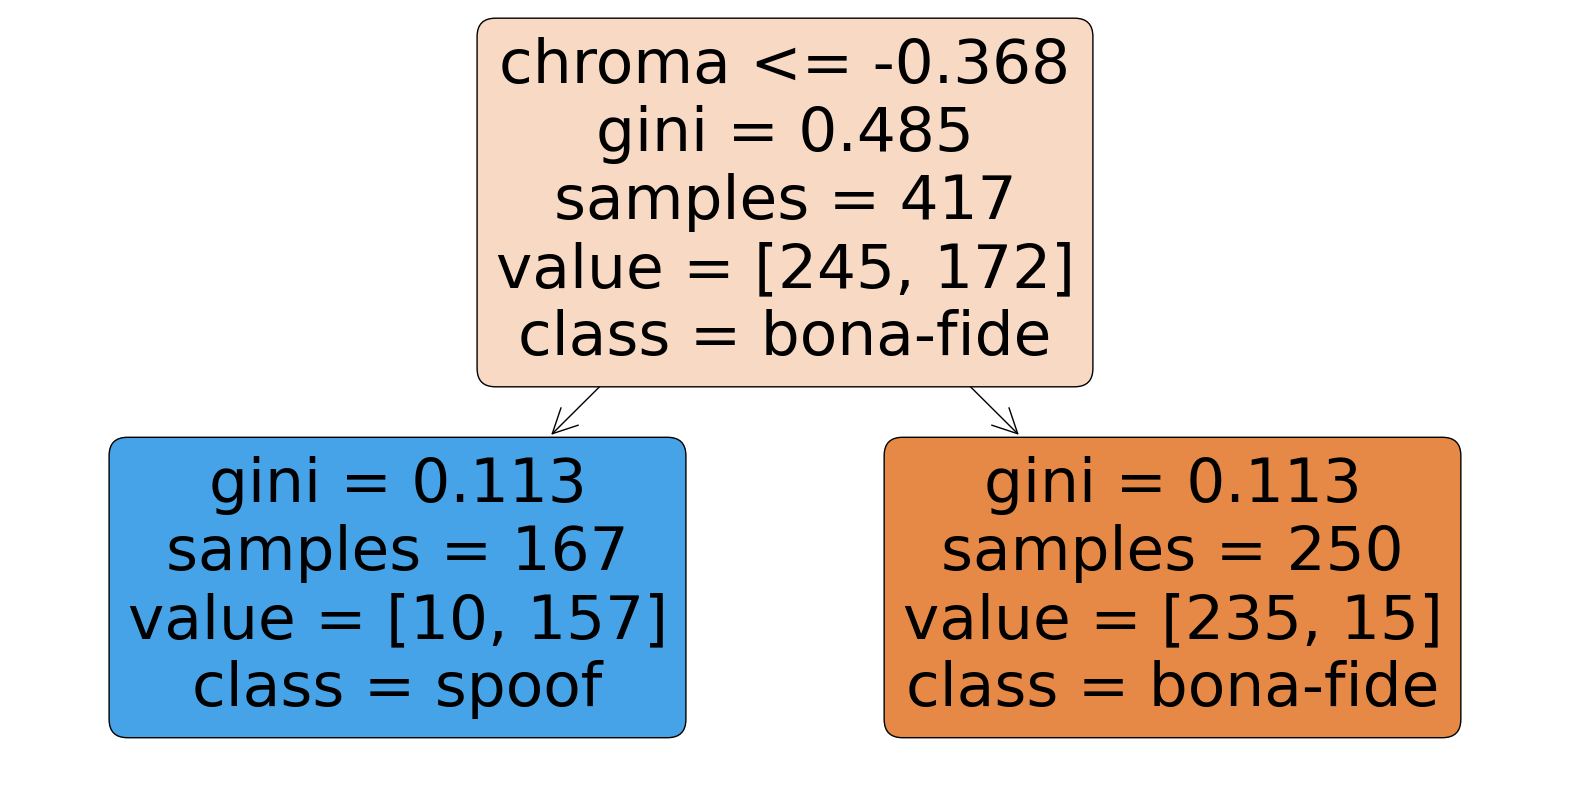

In [21]:
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=voice_data_numeric_columns, class_names=label_encoder.classes_, rounded=True)
plt.show()